In [5]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np

In [7]:
train = pd.read_csv('dataset/train.csv')
train.head()
test = pd.read_csv('dataset/test.csv')
test.head()

weather_moment_id  temperature(C)  wind_strength(kph)  wind_angle(degree)  \
0           WTH_126            24.0                 5.2                  36   
1          WTH_5056            28.2                 NaN                 209   
2          WTH_4707            28.5                10.8                  73   
3          WTH_5700            24.5                 5.0                 333   
4          WTH_3891            26.8                 4.0                 170   

  wind_direction  pressure(millibar)  precipitation(mm)  relative_humidity(%)  \
0             NE              1004.0               0.07                    76   
1            SSW              1005.0               0.00                    51   
2            ENE              1009.0               0.00                    75   
3            NNW              1009.0               0.02                    86   
4              S              1006.0               0.18                    81   

   feelslike_temp(C)  wind_temp(C)  heatflow(C)  dewpoint(C)  vision(km)  \
0               25.8          24.0         25.8         19.6        10.0   
1               29.5          28.2         29.5         17.1        10.0   
2               32.5          28.5         32.5         23.5        10.0   
3               26.8          24.5         26.8         22.0        10.0   
4               30.1          26.8         30.1         23.3         9.0   

   gust_strength(mph)  
0                 6.5  
1                 7.9  
2                 7.8  
3                 5.4  
4                 4.2

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8687 entries, 0 to 8686
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weather_moment_id     8687 non-null   object 
 1   temperature(C)        8687 non-null   float64
 2   wind_strength(kph)    8148 non-null   float64
 3   wind_angle(degree)    8687 non-null   int64  
 4   wind_direction        8358 non-null   object 
 5   pressure(millibar)    8687 non-null   float64
 6   precipitation(mm)     8094 non-null   float64
 7   relative_humidity(%)  8687 non-null   int64  
 8   feelslike_temp(C)     8186 non-null   float64
 9   wind_temp(C)          8687 non-null   float64
 10  heatflow(C)           8687 non-null   float64
 11  dewpoint(C)           8249 non-null   float64
 12  vision(km)            8687 non-null   float64
 13  gust_strength(mph)    8687 non-null   float64
 14  will_rain             8687 non-null   int64  
dtypes: float64(10), int64

In [63]:
train.isnull().sum()

weather_moment_id         0
temperature(C)            0
wind_strength(kph)      539
wind_angle(degree)        0
wind_direction          329
pressure(millibar)        0
precipitation(mm)       593
relative_humidity(%)      0
feelslike_temp(C)       501
wind_temp(C)              0
heatflow(C)               0
dewpoint(C)             438
vision(km)                0
gust_strength(mph)        0
will_rain                 0
dtype: int64

In [9]:

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

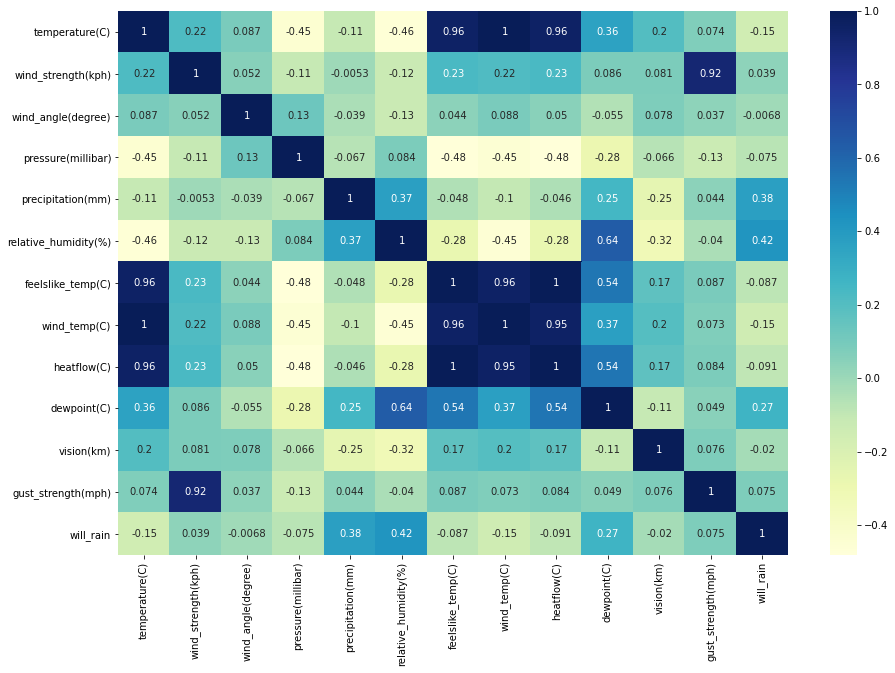

In [10]:

plt.figure(figsize=(15,10))
z = train.corr()
sns.heatmap(z,cmap = 'YlGnBu', annot=True)

In [11]:
train.drop(['weather_moment_id'], axis = 1, inplace= True)
test.drop(['weather_moment_id'], axis = 1, inplace= True)


In [12]:
corr_with_outcome = train.corrwith(train['will_rain']).sort_values()
print(corr_with_outcome)


temperature(C)         -0.153371
wind_temp(C)           -0.147180
heatflow(C)            -0.090844
feelslike_temp(C)      -0.087170
pressure(millibar)     -0.074841
vision(km)             -0.020388
wind_angle(degree)     -0.006762
wind_strength(kph)      0.038583
gust_strength(mph)      0.075353
dewpoint(C)             0.266131
precipitation(mm)       0.375199
relative_humidity(%)    0.422005
will_rain               1.000000
dtype: float64


In [13]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()

In [14]:
train['wind_direction'] = lb.fit_transform(train['wind_direction'].astype(str))
test['wind_direction'] = lb.fit_transform(test['wind_direction'].astype(str))

In [15]:
test.head()

temperature(C)  wind_strength(kph)  wind_angle(degree)  wind_direction  \
0            24.0                 5.2                  36               4   
1            28.2                 NaN                 209              11   
2            28.5                10.8                  73               1   
3            24.5                 5.0                 333               6   
4            26.8                 4.0                 170               8   

   pressure(millibar)  precipitation(mm)  relative_humidity(%)  \
0              1004.0               0.07                    76   
1              1005.0               0.00                    51   
2              1009.0               0.00                    75   
3              1009.0               0.02                    86   
4              1006.0               0.18                    81   

   feelslike_temp(C)  wind_temp(C)  heatflow(C)  dewpoint(C)  vision(km)  \
0               25.8          24.0         25.8         19.6        10.0   
1               29.5          28.2         29.5         17.1        10.0   
2               32.5          28.5         32.5         23.5        10.0   
3               26.8          24.5         26.8         22.0        10.0   
4               30.1          26.8         30.1         23.3         9.0   

   gust_strength(mph)  
0                 6.5  
1                 7.9  
2                 7.8  
3                 5.4  
4                 4.2

In [16]:
corr_with_outcome = train.corrwith(train['will_rain']).sort_values()
print(corr_with_outcome)


temperature(C)         -0.153371
wind_temp(C)           -0.147180
heatflow(C)            -0.090844
feelslike_temp(C)      -0.087170
pressure(millibar)     -0.074841
vision(km)             -0.020388
wind_angle(degree)     -0.006762
wind_strength(kph)      0.038583
gust_strength(mph)      0.075353
wind_direction          0.083018
dewpoint(C)             0.266131
precipitation(mm)       0.375199
relative_humidity(%)    0.422005
will_rain               1.000000
dtype: float64


In [17]:
print(train.shape)
print(test.shape)

(8687, 14)
(1972, 13)


In [18]:
import seaborn as sns

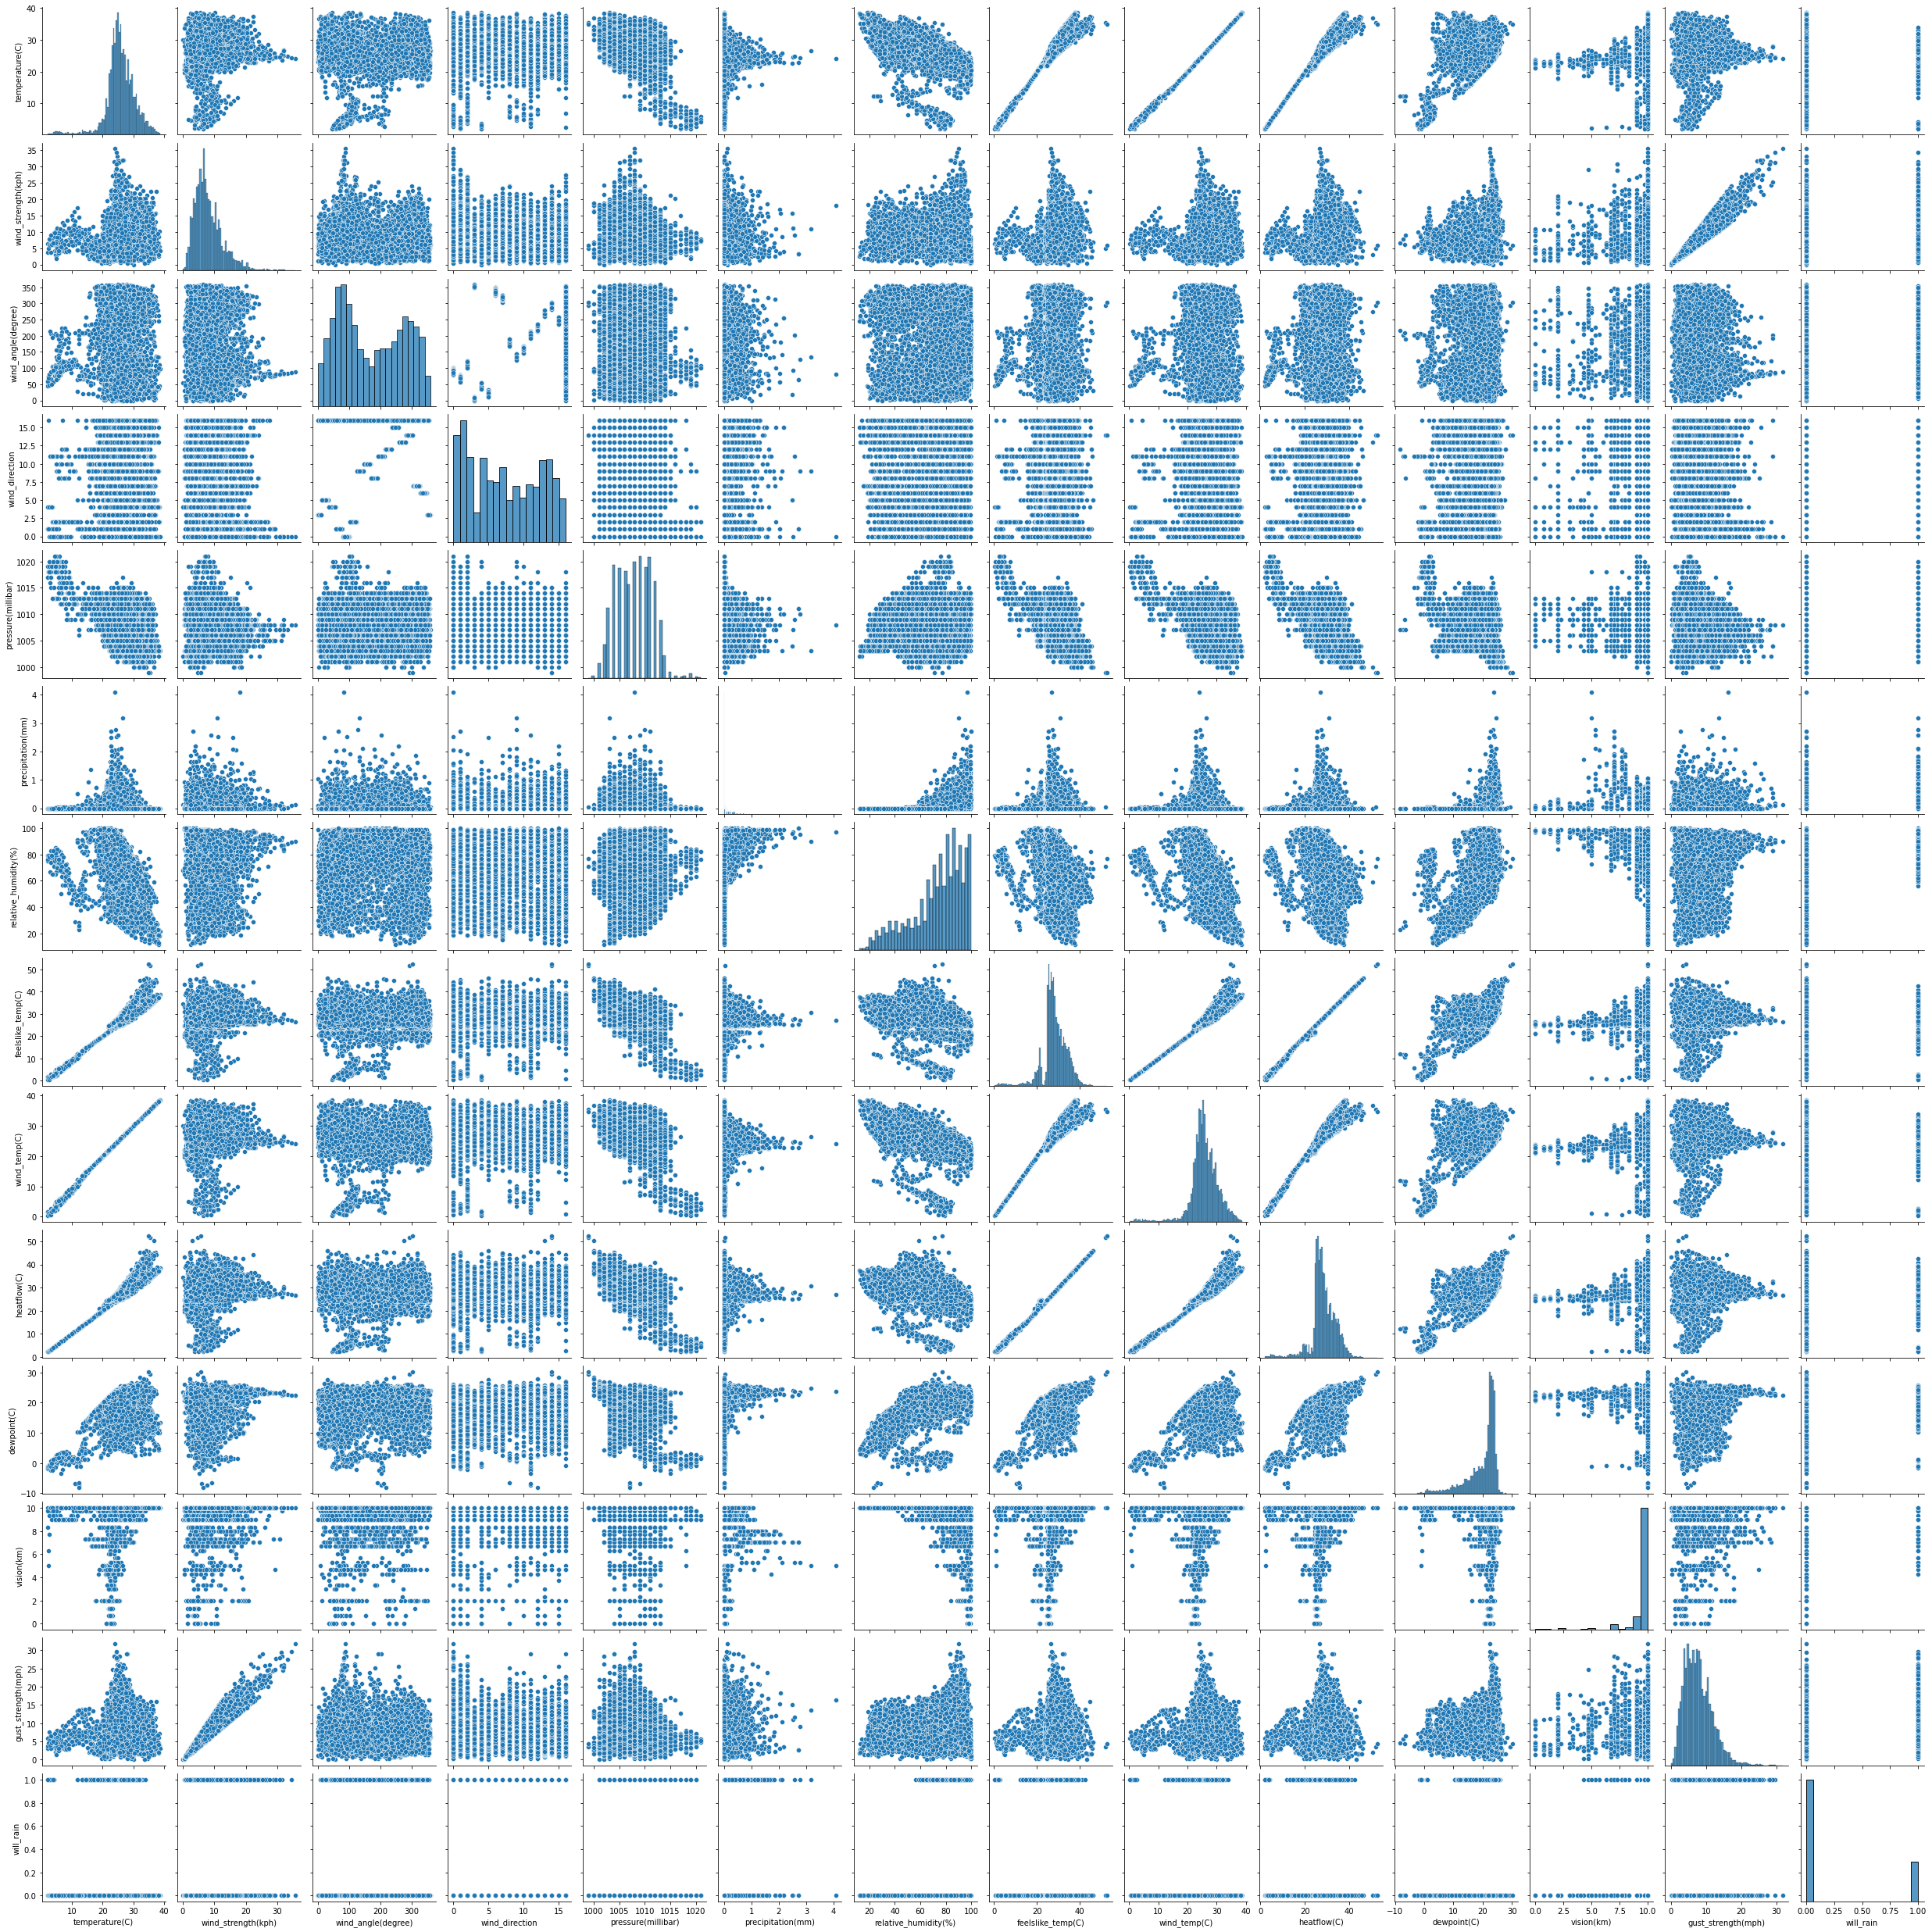

In [20]:
sns.pairplot(train)

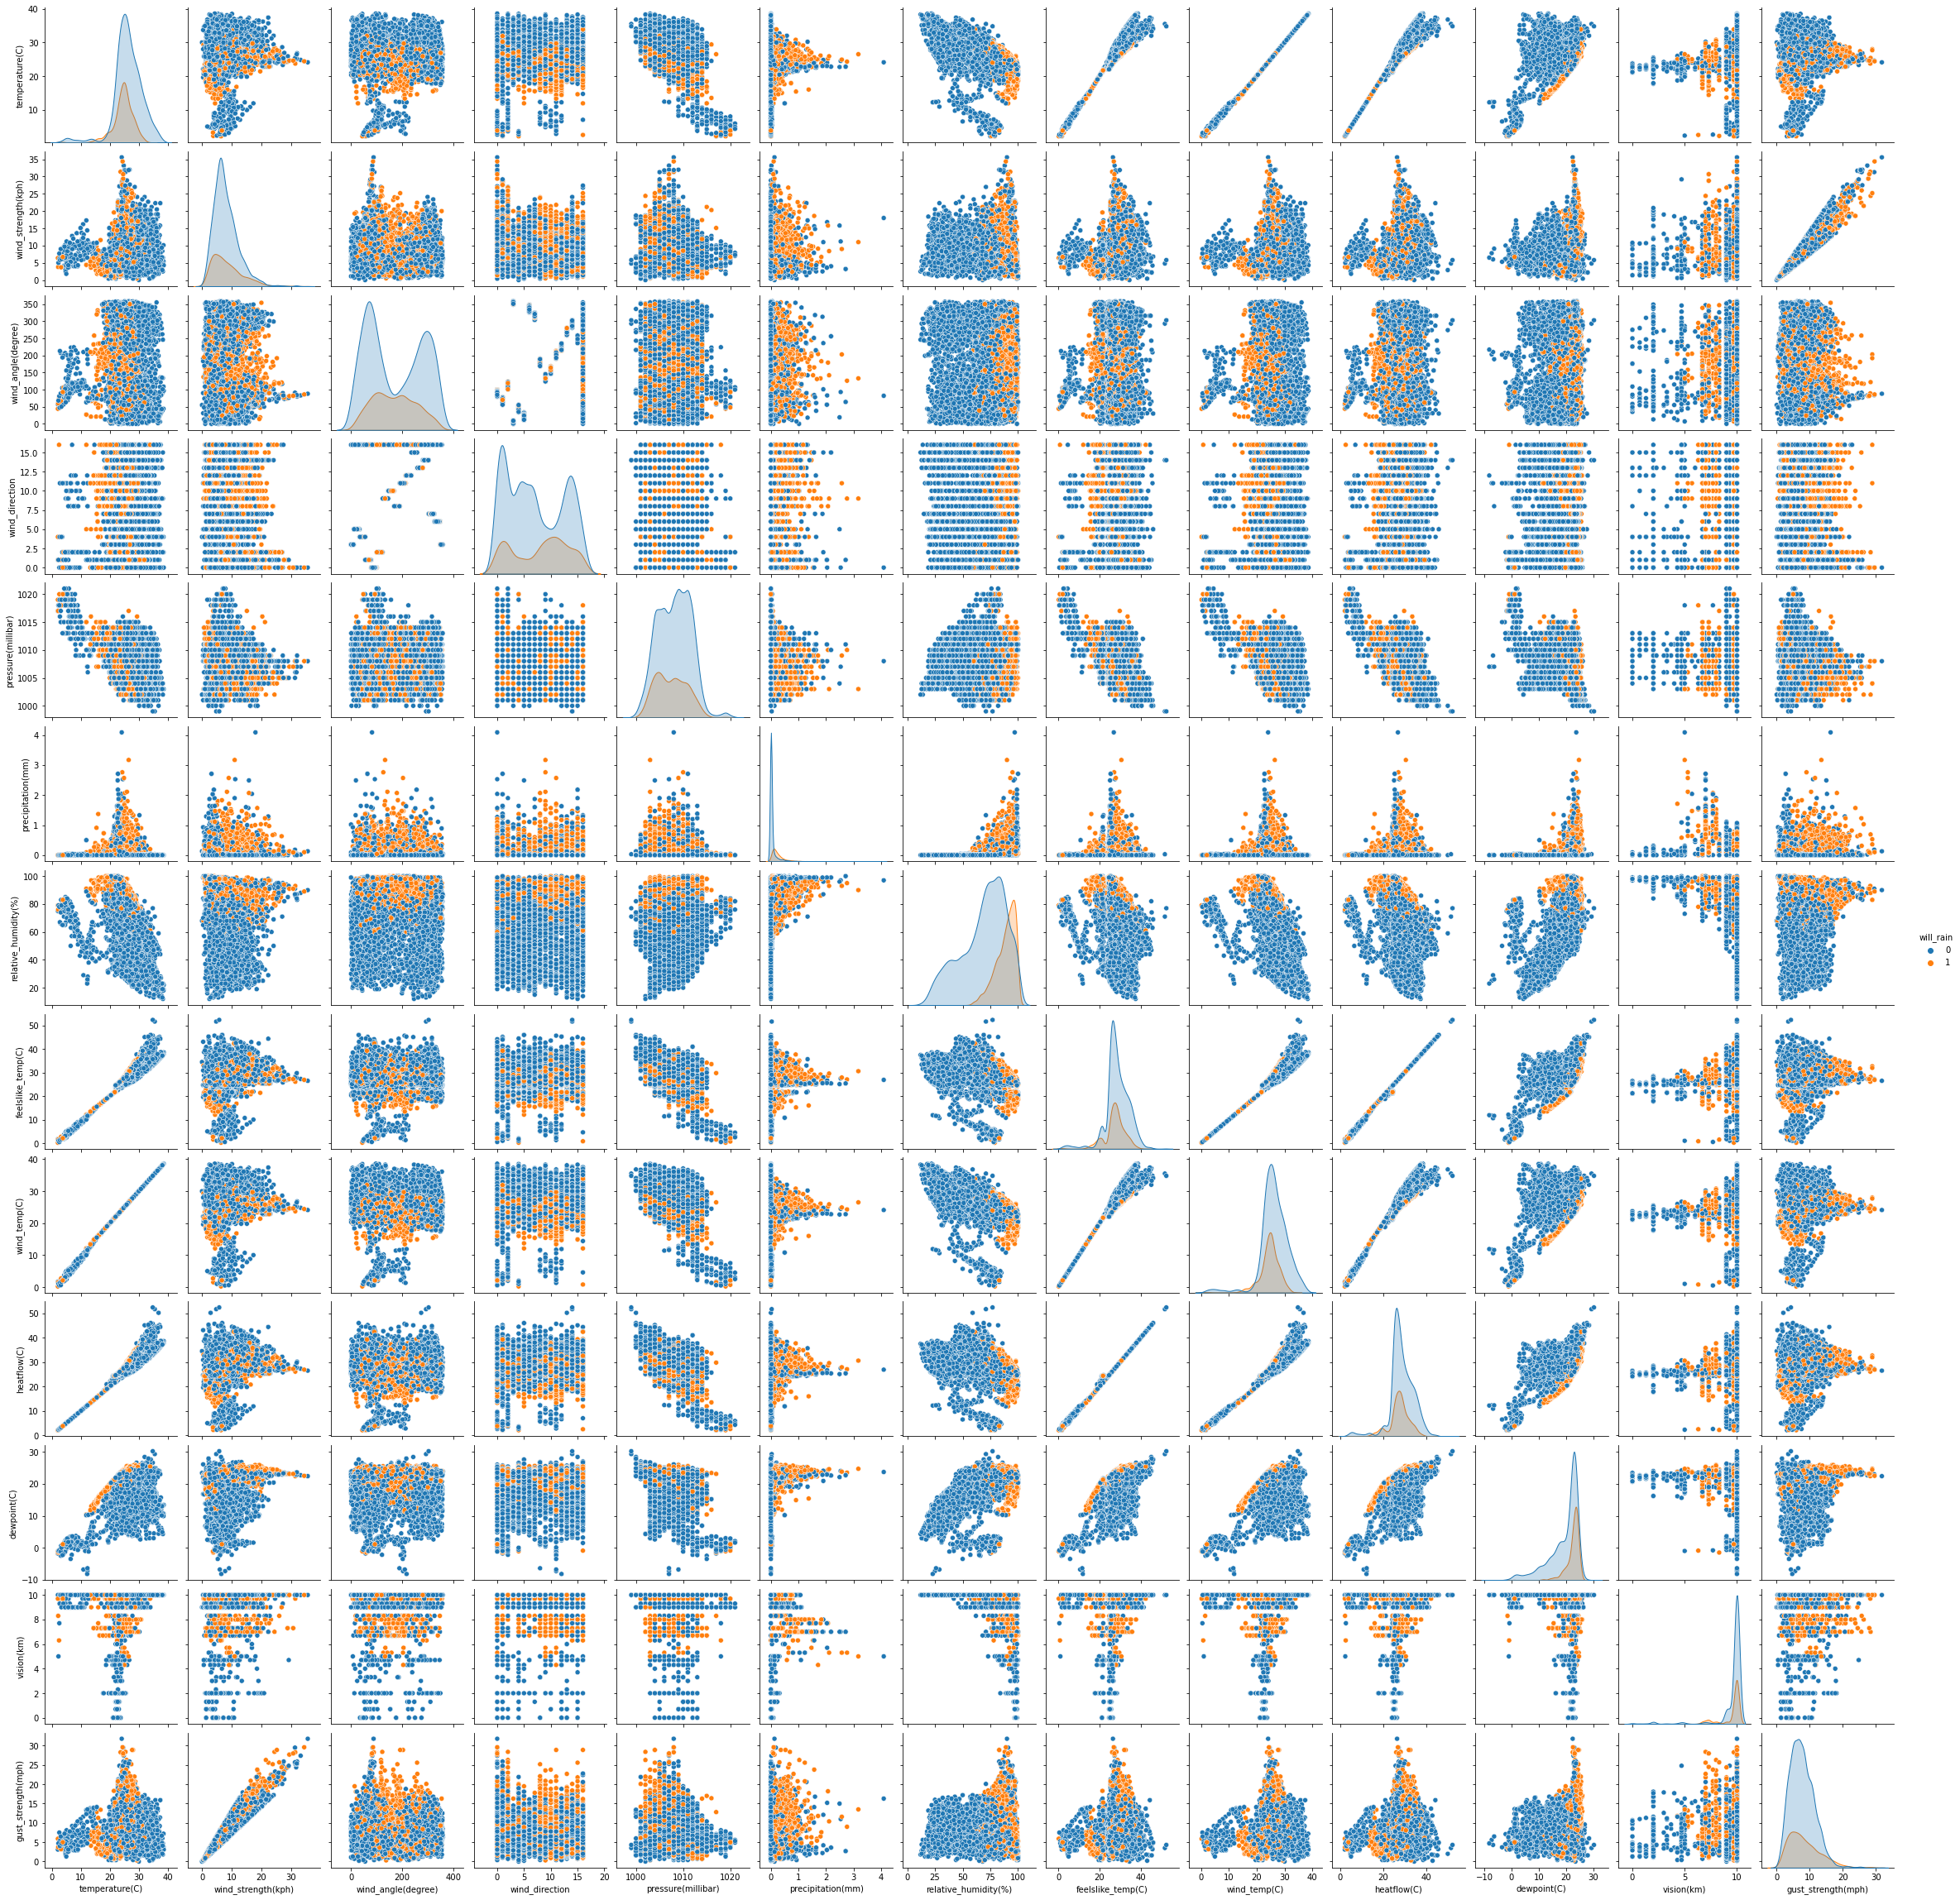

In [19]:
sns.pairplot(train,hue='will_rain')

In [95]:
train = train.dropna()
test = test.dropna()

In [94]:
train.isnull().sum()

temperature(C)          0
wind_strength(kph)      0
wind_angle(degree)      0
wind_direction          0
pressure(millibar)      0
precipitation(mm)       0
relative_humidity(%)    0
feelslike_temp(C)       0
wind_temp(C)            0
heatflow(C)             0
dewpoint(C)             0
vision(km)              0
gust_strength(mph)      0
will_rain               0
dtype: int64

In [102]:
x_train =  train.drop('will_rain',axis=1)
y_train = train[['will_rain']]
x_test  = test

In [109]:
# Applying Logistic Regression on non-scaled variables
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predict = logreg.predict(x_train)

C:\Users\nikee\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nikee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
from sklearn.metrics import accuracy_score

In [ ]:
#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

In [121]:
predict = logreg.predict(x_train)
#test_under = logreg.predict(X_test)
accuracy_score(y_train, predict) 

0.8053839364518977

In [122]:

predicted = logreg.predict(x_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
prediction = pd.DataFrame(predicted)
prediction.columns = ['prediction']
prediction

prediction
0              0
1              0
2              0
3              0
4              0
...          ...
1554           0
1555           0
1556           0
1557           0
1558           0

[1559 rows x 1 columns]

In [161]:
probability = logreg.predict_proba(x_test)
probabilities = pd.DataFrame(probability)
probabilities.columns = ['will not rain','will rain']
probabilities

will not rain  will rain
0          0.892866   0.107134
1          0.827781   0.172219
2          0.589075   0.410925
3          0.828383   0.171617
4          0.582330   0.417670
...             ...        ...
1554       0.992743   0.007257
1555       0.531329   0.468671
1556       0.592044   0.407956
1557       0.642669   0.357331
1558       0.997939   0.002061

[1559 rows x 2 columns]

In [151]:
#x_test.shape

In [150]:
#x_test

In [162]:
result = pd.concat([x_test, probabilities], axis=1, join='inner')
result

temperature(C)  wind_strength(kph)  wind_angle(degree)  wind_direction  \
0               24.0                 5.2                  36              11   
2               28.5                10.8                  73               1   
3               24.5                 5.0                 333              13   
4               26.8                 4.0                 170              15   
5               23.1                 6.1                  53              11   
...              ...                 ...                 ...             ...   
1553            29.8                 4.1                  35              11   
1555            28.1                19.4                 289               6   
1556            22.7                 6.5                 149               2   
1557            26.0                 7.2                 266               5   
1558            29.0                 5.4                  14              12   

      pressure(millibar)  precipitation(mm)  relative_humidity(%)  \
0                 1004.0               0.07                    76   
2                 1009.0               0.00                    75   
3                 1009.0               0.02                    86   
4                 1006.0               0.18                    81   
5                 1010.0               0.00                    90   
...                  ...                ...                   ...   
1553              1005.0               0.00                    50   
1555              1011.0               0.00                    33   
1556              1007.0               0.93                    99   
1557              1014.0               0.00                    61   
1558              1009.0               0.00                    45   

      feelslike_temp(C)  wind_temp(C)  heatflow(C)  dewpoint(C)  vision(km)  \
0                  25.8          24.0         25.8         19.6        10.0   
2                  32.5          28.5         32.5         23.5        10.0   
3                  26.8          24.5         26.8         22.0        10.0   
4                  30.1          26.8         30.1         23.3         9.0   
5                  25.4          23.1         25.4         21.4        10.0   
...                 ...           ...          ...          ...         ...   
1553               31.8          29.8         31.8         18.3        10.0   
1555               27.3          28.1         27.3         10.3        10.0   
1556               25.2          22.7         25.2         22.5        10.0   
1557               27.2          26.0         27.2         18.0        10.0   
1558               29.5          29.0         29.5         15.9        10.0   

      gust_strength(mph)  will not rain  will rain  
0                    6.5       0.892866   0.107134  
2                    7.8       0.589075   0.410925  
3                    5.4       0.828383   0.171617  
4                    4.2       0.582330   0.417670  
5                    7.4       0.837089   0.162911  
...                  ...            ...        ...  
1553                 3.3       0.822604   0.177396  
1555                14.5       0.531329   0.468671  
1556                 5.8       0.592044   0.407956  
1557                 5.1       0.642669   0.357331  
1558                 5.8       0.997939   0.002061  

[1221 rows x 15 columns]